# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&appid=" + weather_api_key + "&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        request = requests.get(city_url + city)
        city_weather = request.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vorgashor
Processing Record 2 of Set 1 | bilibino
Processing Record 3 of Set 1 | revda
Processing Record 4 of Set 1 | waitangi
Processing Record 5 of Set 1 | port-aux-francais
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | camocim
Processing Record 8 of Set 1 | ballina
Processing Record 9 of Set 1 | haiku-pauwela
Processing Record 10 of Set 1 | iqaluit
Processing Record 11 of Set 1 | ribeira grande
Processing Record 12 of Set 1 | nar'yan-mar
Processing Record 13 of Set 1 | edinburgh of the seven seas
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | puerto natales
Processing Record 16 of Set 1 | alice springs
Processing Record 17 of Set 1 | stanley
Processing Record 18 of Set 1 | klyuchi
Processing Record 19 of Set 1 | amahai
Processing Record 20 of Set 1 | mandera
Processing Record 21 of Set 1 | choibalsan
Processing Record 22 of Set 1 | fuvahmul

Processing Record 40 of Set 4 | utrik
Processing Record 41 of Set 4 | neon karlovasion
Processing Record 42 of Set 4 | tolanaro
Processing Record 43 of Set 4 | cabo san lucas
Processing Record 44 of Set 4 | east london
Processing Record 45 of Set 4 | sisimiut
Processing Record 46 of Set 4 | margate
Processing Record 47 of Set 4 | tame
Processing Record 48 of Set 4 | villa gesell
Processing Record 49 of Set 4 | yaren
Processing Record 0 of Set 5 | ilulissat
Processing Record 1 of Set 5 | mirnyy
Processing Record 2 of Set 5 | shaoxing
Processing Record 3 of Set 5 | dourbali
Processing Record 4 of Set 5 | waverly
Processing Record 5 of Set 5 | dwarka
Processing Record 6 of Set 5 | kodiak
Processing Record 7 of Set 5 | preobrazheniye
Processing Record 8 of Set 5 | pacific grove
Processing Record 9 of Set 5 | robore
Processing Record 10 of Set 5 | ad dabbah
Processing Record 11 of Set 5 | grand falls-windsor
Processing Record 12 of Set 5 | alesund
Processing Record 13 of Set 5 | okhotsk
Pro

Processing Record 29 of Set 8 | gebeit
Processing Record 30 of Set 8 | eyl
Processing Record 31 of Set 8 | irymple
Processing Record 32 of Set 8 | eastham
Processing Record 33 of Set 8 | iwon-up
Processing Record 34 of Set 8 | at-bashi
Processing Record 35 of Set 8 | ocean city
Processing Record 36 of Set 8 | merizo village
Processing Record 37 of Set 8 | abu zabad
Processing Record 38 of Set 8 | fort mcmurray
Processing Record 39 of Set 8 | nyrob
Processing Record 40 of Set 8 | fuling
Processing Record 41 of Set 8 | ciudad lazaro cardenas
Processing Record 42 of Set 8 | chupaca
Processing Record 43 of Set 8 | port hedland
Processing Record 44 of Set 8 | leninskoye
Processing Record 45 of Set 8 | belcista
Processing Record 46 of Set 8 | nantucket
Processing Record 47 of Set 8 | inhambane
Processing Record 48 of Set 8 | bologoye-4
City not found. Skipping...
Processing Record 49 of Set 8 | puerto san jose
Processing Record 0 of Set 9 | asau village
City not found. Skipping...
Processing

Processing Record 17 of Set 12 | oranjemund
Processing Record 18 of Set 12 | jayapura
Processing Record 19 of Set 12 | kittila
Processing Record 20 of Set 12 | reyes
Processing Record 21 of Set 12 | minas de marcona
Processing Record 22 of Set 12 | ataq
Processing Record 23 of Set 12 | marquette
Processing Record 24 of Set 12 | bubaque
Processing Record 25 of Set 12 | mugia
Processing Record 26 of Set 12 | daleville
Processing Record 27 of Set 12 | yagry
City not found. Skipping...
Processing Record 28 of Set 12 | al hudaydah
Processing Record 29 of Set 12 | hanzhong
Processing Record 30 of Set 12 | bikenibeu village
Processing Record 31 of Set 12 | nizhneangarsk
Processing Record 32 of Set 12 | berriane
Processing Record 33 of Set 12 | isle of lewis
City not found. Skipping...
Processing Record 34 of Set 12 | pontianak
Processing Record 35 of Set 12 | brooks
Processing Record 36 of Set 12 | ceres
Processing Record 37 of Set 12 | ouesso
Processing Record 38 of Set 12 | xinqing
Processi

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          567
Lat           567
Lng           567
Max Temp      567
Humidity      567
Cloudiness    567
Wind Speed    567
Country       567
Date          567
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vorgashor,67.5833,63.9500,5.81,90,97,3.21,RU,1692826822
1,bilibino,68.0546,166.4372,7.52,53,36,0.64,RU,1692826822
2,revda,56.8010,59.9303,3.88,85,6,2.01,RU,1692826833
3,waitangi,-43.9535,-176.5597,9.90,91,100,3.13,NZ,1692826834
4,port-aux-francais,-49.3500,70.2167,4.23,97,99,13.34,TF,1692826835


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,5.81,90,97,3.21,RU,1692826822
1,bilibino,68.0546,166.4372,7.52,53,36,0.64,RU,1692826822
2,revda,56.8010,59.9303,3.88,85,6,2.01,RU,1692826833
3,waitangi,-43.9535,-176.5597,9.90,91,100,3.13,NZ,1692826834
4,port-aux-francais,-49.3500,70.2167,4.23,97,99,13.34,TF,1692826835


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

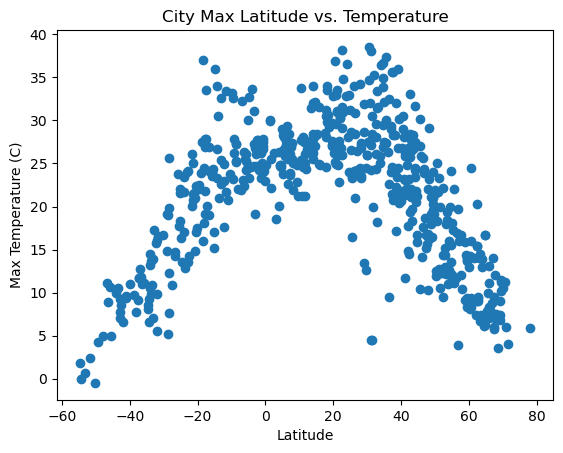

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"])

# Incorporate the other graph properties
plt.title("City Max Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

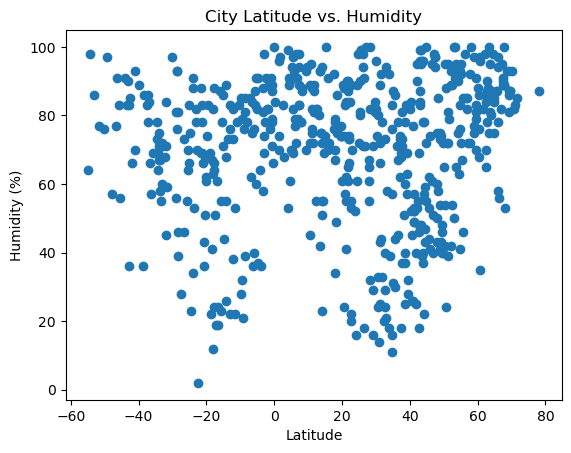

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

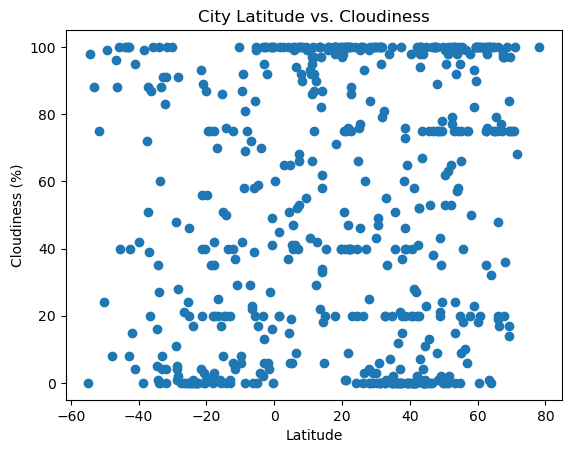

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

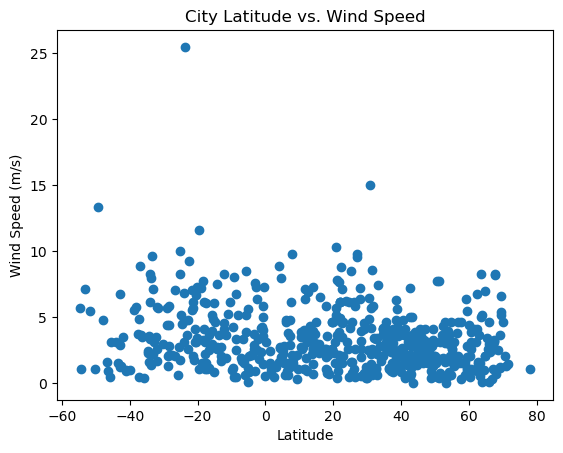

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"])

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [41]:
# Define a function to create Linear Regression plots
def lin_regress(x, y):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    r_line = x * slope + intercept
    print(f'The r-value is: {r_value}')
    
    plt.scatter(x, y)
    plt.plot(x, r_line, color='red')
    
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    plt.text(min(x), max(y), line_eq, fontsize=12, color='red') 

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vorgashor,67.5833,63.9500,5.81,90,97,3.21,RU,1692826822
1,bilibino,68.0546,166.4372,7.52,53,36,0.64,RU,1692826822
2,revda,56.8010,59.9303,3.88,85,6,2.01,RU,1692826833
8,haiku-pauwela,20.9219,-156.3051,29.54,57,40,10.29,US,1692826839
9,iqaluit,63.7506,-68.5145,6.85,81,100,8.23,CA,1692826840


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,waitangi,-43.9535,-176.5597,9.90,91,100,3.13,NZ,1692826834
4,port-aux-francais,-49.3500,70.2167,4.23,97,99,13.34,TF,1692826835
5,grytviken,-54.2811,-36.5092,0.01,98,98,1.09,GS,1692826836
6,camocim,-2.9022,-40.8411,26.76,69,13,7.59,BR,1692826837
7,ballina,-28.8667,153.5667,14.88,81,48,4.39,AU,1692826838


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.7028383289799872


Text(0, 0.5, 'Max Temp')

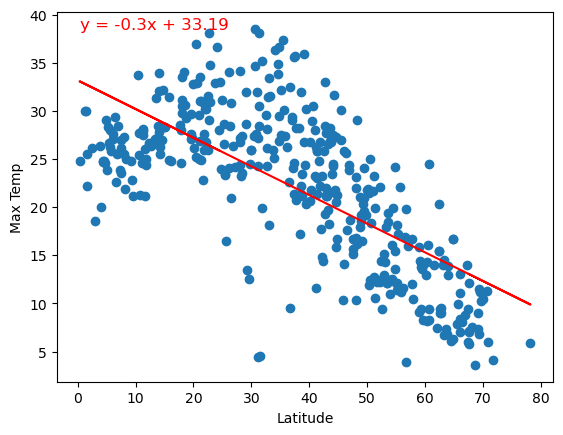

In [53]:
#Linear regression on Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"])
plt.annotate(plot, xy=(0,0))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

The r-value is: 0.8439157597818189


Text(0, 0.5, 'Max Temp')

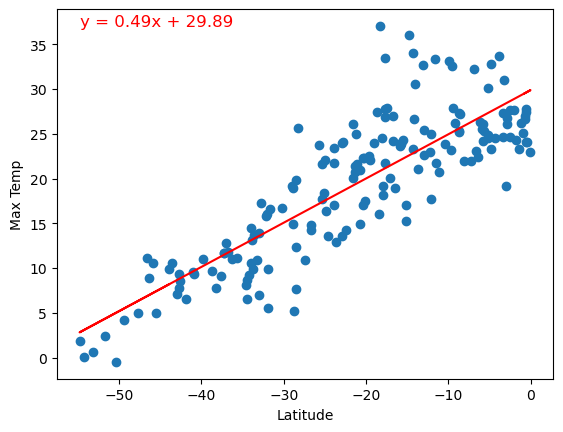

In [51]:
# Linear regression on Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"])
plt.annotate(plot, xy=(0,0))
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.05642055136095082


Text(0, 0.5, 'Humidity')

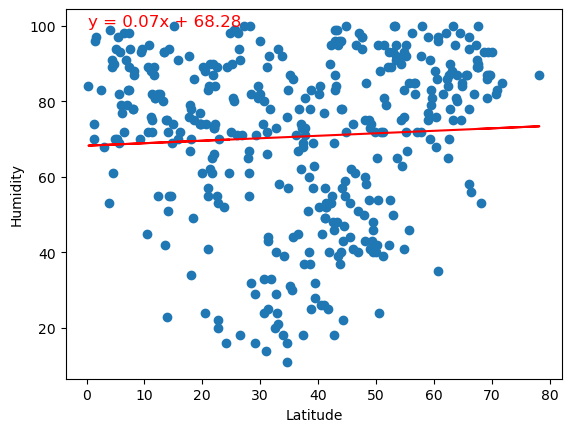

In [56]:
# Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"])
plt.annotate(plot, xy=(0,0))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

The r-value is: -0.07341611642514037


Text(0, 0.5, 'Max Temp')

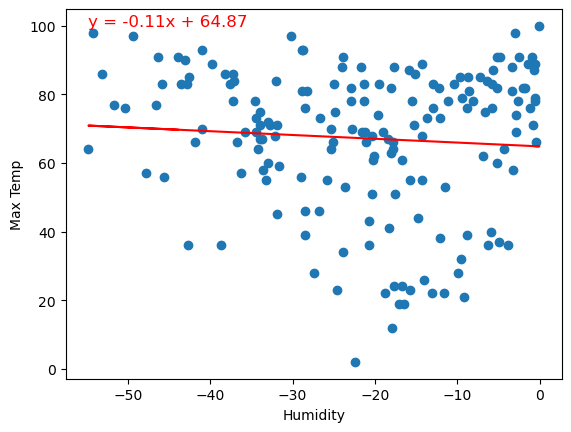

In [55]:
# Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"])
plt.annotate(plot, xy=(0,0))
plt.xlabel("Latitude")
plt.ylabel("Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: -0.018372319619034863


Text(0, 0.5, 'Cloudiness')

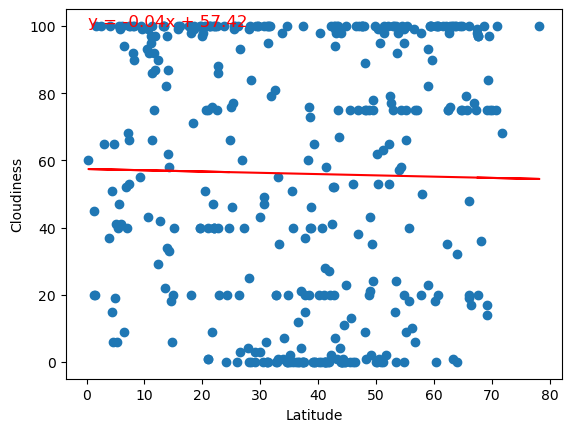

In [57]:
# Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"])
plt.annotate(plot, xy=(0,0))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

The r-value is: -0.07362285507433969


Text(0, 0.5, 'Cloudiness')

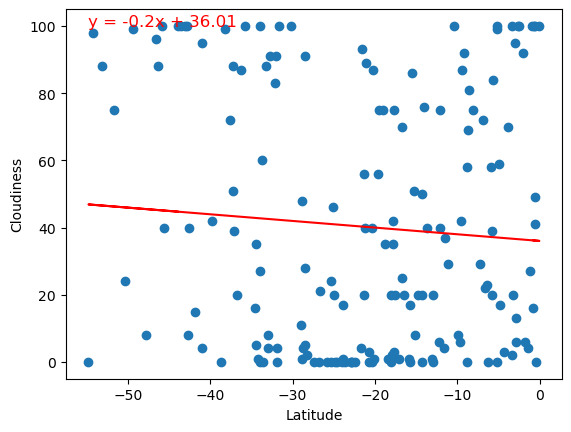

In [58]:
# Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"])
plt.annotate(plot, xy=(0,0))
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.10926628368759753


Text(0, 0.5, 'Wind Speed')

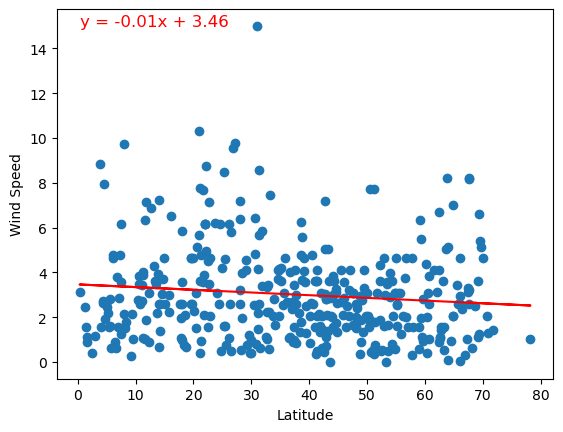

In [59]:
# Northern Hemisphere
plot = lin_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"])
plt.annotate(plot, xy=(0,0))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

The r-value is: -0.048755038703022564


Text(0, 0.5, 'Wind Speed')

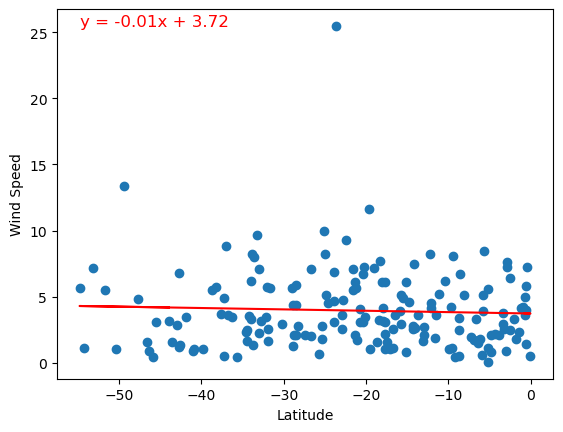

In [60]:
# Southern Hemisphere
plot = lin_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"])
plt.annotate(plot, xy=(0,0))
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE